In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from gensim.models import word2vec

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

from TurkishStemmer import TurkishStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

%matplotlib inline

In [12]:
df = pd.read_csv('../assets/lyrics/master_data_20180626.csv', index_col = 0)

In [13]:
df.head()

,artist,title,album,text,english_score,release,name,real_name
285,Abdal,Altın Yüzüğüm Kırıldı,Ervah-I Ezelde,Altın yüzüğüm kırıldı (hey) Suya düştü su duru...,0,2013-03-16,Altın Yüzüğüm Kırıldı,Altın Yüzüğüm Kırıldı
286,Abdal,Bağbozumu,Ervah-I Ezelde,Bir bağ bozumuydu gidişin Plajlar boşalmıştı B...,0,2011-12-02,Bağbozumu,Bağbozumu
289,Abdal,Bir Of Çeksem Karşıki Dağlar Yıkılır,Ervah-I Ezelde,Bir of çeksem karşı ki dağlar yıkılır Bugün po...,0,2011-12-02,Bir Of Çeksem Karşıki Dağlar Yıkılır,Bir Of Çeksem Karşıki Dağlar Yıkılır
292,Abdal,Eğin Dedikleri Bir Küçük Şehir,Ervah-I Ezelde,Eğin dedikleri (anam) bir küçük şehir (nidem) ...,0,2011-12-02,Eğin Dedikleri Bir Küçük Şehir,Eğin Dedikleri Bir Küçük Şehir
296,Abdullah Akbulak,Acizim,Zakirin Gözyaşı,"Subhanım Allah, sultanım Allah, Mağrifet eden ...",0,2003-11-07,Acizim,Acizim


In [14]:
df['year'] = pd.to_datetime(df['release']).dt.year

In [15]:
df.drop(['real_name', 'english_score', 'release'], axis = 1, inplace = True)

In [21]:
df['after_akp'] = df['year'].map(lambda x: 1 if x >= 2002 else 0)

In [22]:
df.groupby('after_akp').count()

,artist,title,album,text,name,year
after_akp,,,,,,
0,4763,4763,4763,4763,4763,4763
1,10928,10928,10928,10928,10928,10928


In [23]:
df['after_attempted_coup'] = df['year'].map(lambda x: 1 if x >= 2016 else 0)

In [25]:
df.groupby('after_attempted_coup').count()['artist']

after_attempted_coup
0    14528
1     1163
Name: artist, dtype: int64

In [28]:
import math

In [38]:
def convert_to_decade(year):
    return math.floor((year - 1900 )/10)

In [39]:
df['decade'] = df['year'].map(convert_to_decade)

In [54]:
df[df['text'].str.contains('reklam')]

,artist,title,album,text,name,year,after_akp,after_attempted_coup,decade,reg_text
1593,Ais Ezhel,Ankaradayız,Sekiz 2,Red: Ankaradaaayız ! Trenle İzmir ordan İstanb...,Ankaradayız,2013,1,0,11,Red: Ankaradaaayız ! Trenle İzmir ordan İstanb...
1712,Ajda Pekkan,Ne Varsa Bende Var,The Best Of Ajda Pekkan,Ne varsa bende var Aşk istediğin kadar Gel sar...,Ne Varsa Bende Var,1976,0,0,7,Ne varsa bende var Aşk istediğin kadar Gel sar...
2156,Ali Güven,Bütün Kızlar Güzel,Boynumun Borcu,Yine deli deli carpiyor gonlum Belami buldum k...,Bütün Kızlar Güzel,1999,0,0,9,Yine deli deli carpiyor gonlum Belami buldum k...
2303,Alişan,Ben Daha Çok Severim,Olay Bitmiştir,Aklimda fikrimde sen Gönlümde ask yarasi Öyle ...,Ben Daha Çok Severim,2005,1,0,10,Aklimda fikrimde sen Gönlümde ask yarasi Öyle ...
5747,Arda,Ararsın Bulamazsın,Ölüm Vuruşu,"Askimi ver geriye, Döndum ben bir deliye, Yaln...",Ararsın Bulamazsın,2003,1,0,10,"Askimi ver geriye, Döndum ben bir deliye, Yaln..."
6414,Asi Styla,Gurbet Gözlüm,Albüm Dışı,kaderimi yazan kalem kırılsın yar kırk yerinde...,Gurbet Gözlüm,2017,1,1,11,kaderimi yazan kalem kırılsın yar kırk yerinde...
6870,Aşık Veysel,Gel Ey Aşık,Yöresel Türküler,Gel ey aşık bu bir esrar-ı Hak'tır Erenlerin y...,Gel Ey Aşık,1997,0,0,9,Gel ey aşık bu bir esrar-ı Hak'tır Erenlerin y...
7052,Asuman Krause,İstifa,Kukla,Istifa Yanimdaydin ama uzagimda bu nasil birse...,İstifa,2006,1,0,10,Istifa Yanimdaydin ama uzagimda bu nasil birse...
8992,Barış Manço,Ahmet Beyin Ceketi,Sahibinden İhtiyaçtan,Tanrı bütün kullara rızkını dağıtırken Kimi sı...,Ahmet Beyin Ceketi,1989,0,0,8,Tanrı bütün kullara rızkını dağıtırken Kimi sı...
9368,Belkıs Akkale,Dut Ağacı Boyunca,deli sevda,Dut ağacı boyunca Dut yemedim Doyunca Yari hal...,Dut Ağacı Boyunca,1988,0,0,8,Dut ağacı boyunca Dut yemedim Doyunca Yari hal...


In [226]:
def text_process(text, stem = True):
    '''
    Takes in a string of text, then performs the following:
        1. Tokenizes and removes punctuation
        2. Removes stopwords
        3. Stems
        4. Returns a list of the cleaned text
    '''
    if pd.isnull(text):
        return []
    # tokenizing and removing punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    text_processed=tokenizer.tokenize(text)
    
    # removing any stopwords
    text_processed = [word.lower() for word in text_processed if word.lower() not in stopwords.words('turkish')]
    
    # stemming
    if stem == True:
        stemmer = TurkishStemmer()
        text_processed = [stemmer.stem(word) for word in text_processed]
    
    try:
        text_processed.remove('b')
    except: 
        pass

    return text_processed ## <-- we're keeping our words distinct

In [227]:
corpus = df['text'].map(text_process)

In [ ]:
corpus.head()

In [ ]:
num_features = 150    # Word vector dimensionality                      
min_word_count = 10   # Minimum word count (seems to mean that if a word appears less than this number ignore it)                        
num_workers = 4       # Number of threads to run in parallel
context = 5          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

model = word2vec.Word2Vec(corpus, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

In [ ]:
model.train(corpus, total_examples =len(corpus), epochs = 10)

In [ ]:
list(model.wv.vocab.keys())

In [ ]:
model.wv.most_similar(positive = ['ümit'])

In [ ]:

model.wv.most_similar('insan')

In [ ]:
model.wv.most_similar('yardım')

In [ ]:
model.wv.most_similar('the')


## Clearly I didn't filter out enough English lyrics!

In [228]:
len(corpus)

15691

In [229]:
len(df['after_akp'])

15691

In [259]:
cvec = CountVectorizer(stop_words=stopwords.words('turkish'),ngram_range=(1,3))

In [260]:
def combine_into_sentences(text):
    return " ".join(text)

In [261]:
corpus_non_tokenized = corpus.map(combine_into_sentences)

In [262]:
cvec.fit(corpus_non_tokenized)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None,
        stop_words=['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [263]:
transformed_corpus = cvec.transform(corpus_non_tokenized)

In [235]:
word_table = pd.DataFrame(transformed_corpus.todense(), columns = cvec.get_feature_names())

In [236]:
pd.DataFrame(word_table.sum()).sort_values(by = 0, ascending = False)

,0
ben,27497
bir,24165
sen,23783
aşk,8192
var,6903
göz,6578
ban,5842
gün,5648
gel,5578
san,5459


In [239]:
transformed_corpus.shape

(15691, 53995)

In [241]:
df['after_akp'].shape

(15691,)

In [242]:
from sklearn.model_selection import train_test_split

In [264]:
X_train, X_test, y_train, y_test = train_test_split(transformed_corpus, df['after_akp'], shuffle = True, stratify = df['after_akp'])

In [245]:
from sklearn.ensemble import RandomForestClassifier

In [246]:
from sklearn.model_selection import cross_val_score

In [267]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
cross_val_score(rf, X_train, y_train, cv = 5, scoring='roc_auc')

array([ 0.5609044 ,  0.55913294,  0.54409927,  0.57122562,  0.51747838])

In [249]:
from sklearn.metrics import confusion_matrix

In [268]:
confusion_matrix(y_test, rf.predict(X_test))

array([[  71, 1120],
       [  91, 2641]])

In [251]:
from sklearn.metrics import roc_curve, auc

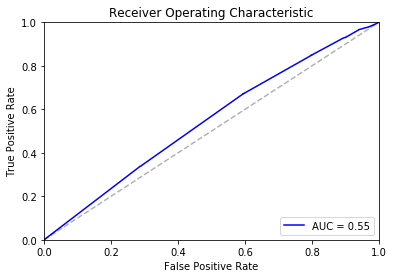

In [280]:
fpr, tpr, threshold = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--', alpha = 0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [287]:
from sklearn.svm import SVC

In [292]:
model2 = SVC(probability=True)

In [293]:
model2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
cross_val_score(model2, X_train, y_train, cv = 5, scoring = 'roc_auc')

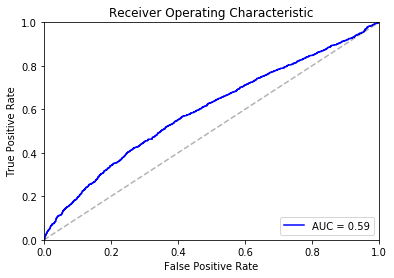

In [301]:
fpr, tpr, threshold = roc_curve(y_test, model2.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--', alpha = 0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [295]:
from sklearn.linear_model import LogisticRegression

In [296]:
lr = LogisticRegression()

In [297]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [299]:
cross_val_score(lr, X_train, y_train, scoring='roc_auc')

array([ 0.63246524,  0.62480761,  0.62931364])

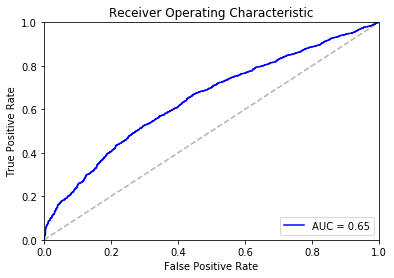

In [300]:
fpr, tpr, threshold = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--', alpha = 0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()